In [1]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn
print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))

Python: 3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]
scipy: 1.10.1
numpy: 1.24.3
pandas: 1.5.3
sklearn: 1.2.2
matplotlib: 3.7.1


In [2]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','single_epithelial_size','bare_nuclei',
         'bland_chromation','normal_nucleoli','nutises','class']
df = pd.read_csv(url,names=names)

In [4]:
#Preprocess the data
df.replace('?',-999999, inplace=True)
print(df.axes)
df.drop(['id'],1,inplace=True)
#print the shape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromation', 'normal_nucleoli', 'nutises', 'class'],
      dtype='object')]
(699, 10)


C:\Users\mmanasanjani\AppData\Local\Temp\ipykernel_33296\4031150550.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['id'],1,inplace=True)


In [5]:
#Dataset visualization
print(df.loc[6])

clump_thickness            1
uniform_cell_size          1
uniform_cell_shape         1
marginal_adhesion          1
single_epithelial_size     2
bare_nuclei               10
bland_chromation           3
normal_nucleoli            1
nutises                    1
class                      2
Name: 6, dtype: object


In [6]:
print(df.loc[6])
print(df.describe())

clump_thickness            1
uniform_cell_size          1
uniform_cell_shape         1
marginal_adhesion          1
single_epithelial_size     2
bare_nuclei               10
bland_chromation           3
normal_nucleoli            1
nutises                    1
class                      2
Name: 6, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromation  \
count         699.000000       

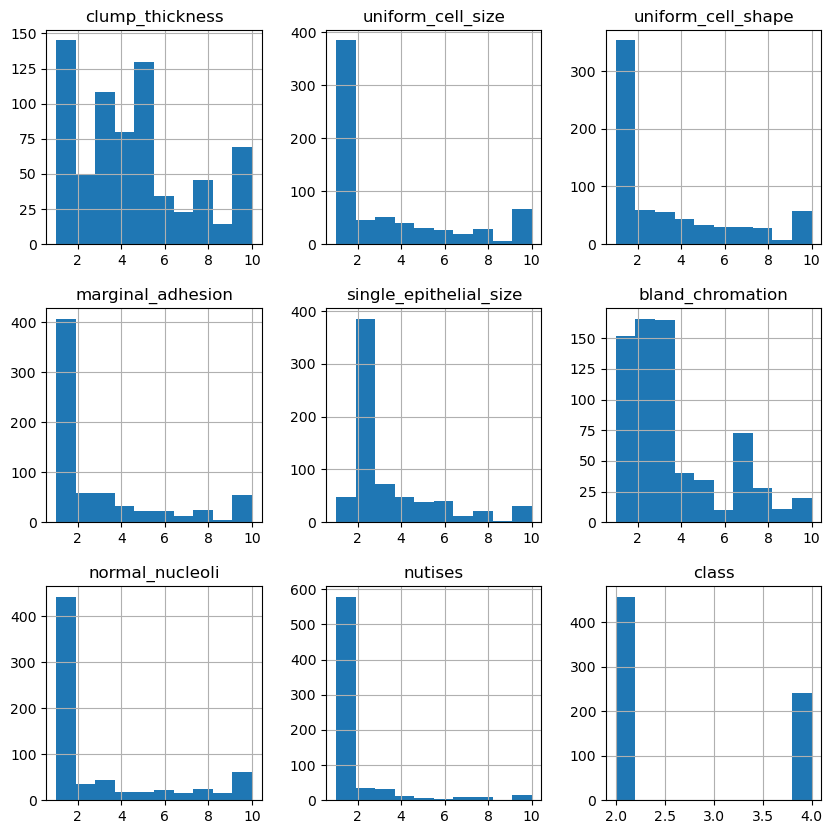

In [7]:
#plot histograms for each variable
df.hist(figsize=(10,10))
plt.show()

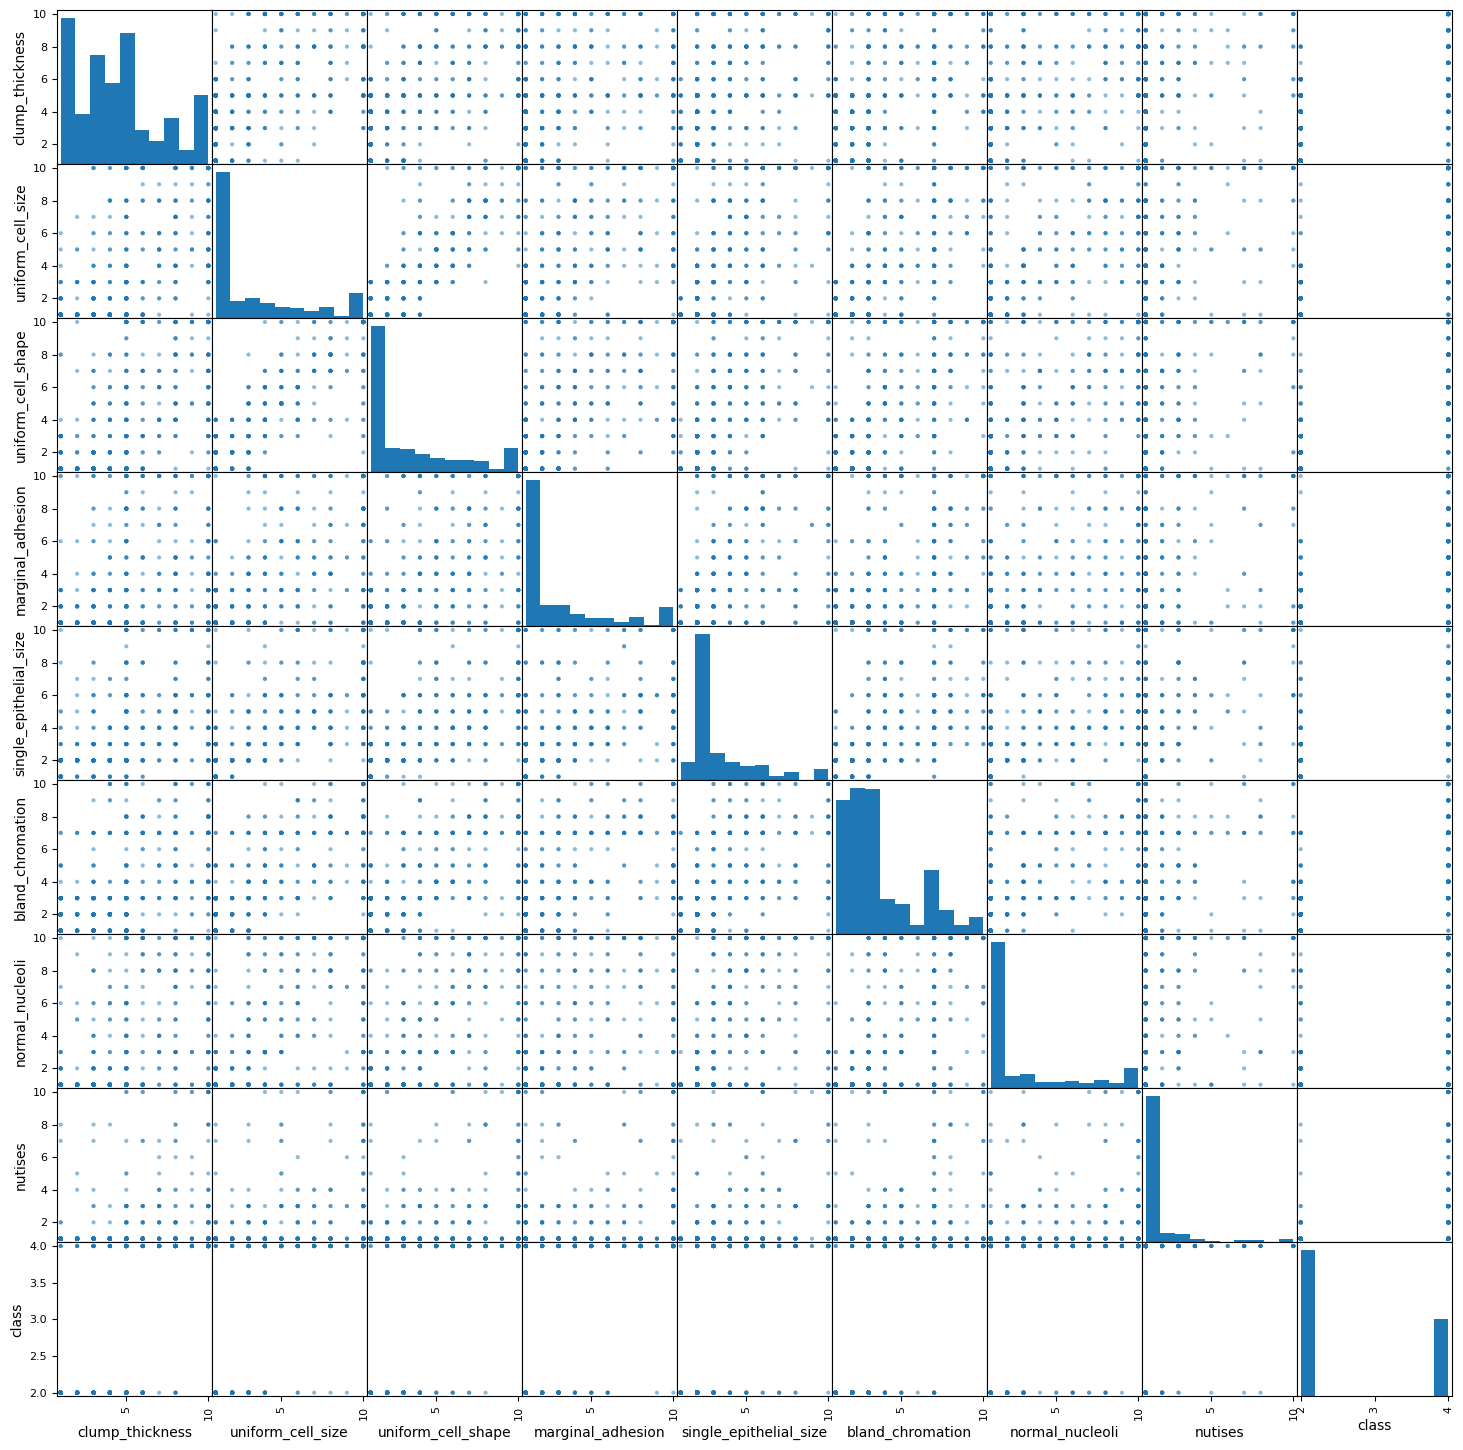

In [8]:
scatter_matrix(df,figsize=(18,18))
plt.show()

In [9]:
#Create X and Y datasets for training
X = np.array(df.drop(['class'],1))
y = np.array(df['class'])
X_train, X_test,y_train,y_test= model_selection.train_test_split(X,y,test_size=0.2)

C:\Users\mmanasanjani\AppData\Local\Temp\ipykernel_33296\3166211361.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['class'],1))


In [10]:
#testing options
seed = 8
scoring = 'accuracy'

In [12]:
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))
#evaluate each model in turn
results =[]
names=[]
for name, model in models:
  kfold = model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
  cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg="%s: %f  (%f)" %(name,cv_results.mean(),cv_results.std())
  print(msg)

KNN: 0.967857  (0.023690)
SVM: 0.659935  (0.054905)


In [13]:
# Make predictions on validation dataset
for name, model in models:
  model.fit(X_train,y_train)
  predictions = model.predict(X_test)
  print(name)
  print(accuracy_score(y_test,predictions))
  print(classification_report(y_test,predictions))
  #Accuracy is the ratio of correctly predicted observation to the total observations
  #Prediction: (false positive) ratio of correctly predicted postive observations to the total predicted positive observations
  #Recall (sensitivity): (false negative) ratio of correctly predicted positive obseravations to the all observations in actual class- yes
  #f1-score: is the weitghted average of precion and recall. Therefore, this score takes both positive and negative

KNN
0.9571428571428572
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        89
           4       0.94      0.94      0.94        51

    accuracy                           0.96       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140

SVM
0.6357142857142857
              precision    recall  f1-score   support

           2       0.64      1.00      0.78        89
           4       0.00      0.00      0.00        51

    accuracy                           0.64       140
   macro avg       0.32      0.50      0.39       140
weighted avg       0.40      0.64      0.49       140



C:\Users\mmanasanjani\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mmanasanjani\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mmanasanjani\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [14]:
clf = KNeighborsClassifier()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

0.9571428571428572
[2]
